# Toronto Shelter Usage Trends

This report offers a comprehensive exploratory data analysis of Toronto's shelter usage throughout 2021 with a goal to uncover the underlying trends surrounding homelessness in the city.

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Data Cleaning & Data Wrangling

In [41]:
# Store dataset in variables
df_raw = pd.read_excel('INF2178_A1_data.xlsx')
df_description = pd.read_excel('INF2178_A1_data.xlsx',sheet_name='feature description')

# Set display options to show all rows and columns
pd.set_option('display.max_colwidth', None)

# Display the description of the the columns
df_description.dropna()

,Feature,Description
0,OCCUPANCY_DATE,"Date of the record. This date refers to the evening of the overnight period being reported. The occupancy data is retrieved at 4:00 am the following morning, so an OCCUPANCY_DATE of January 1, 2021 would refer to data collected at 4:00 am on January 2, 202"
1,ORGANIZATION_NAME,Name of the organization providing the overnight service
2,PROGRAM_ID,Unique ID to consistently identify programs even if the program name changes.
3,PROGRAM_NAME,Name of the program
4,SECTOR,"A means of categorizing homeless shelters based on the gender, age and household size of the service user group(s) served at the shelter location. There are currently five shelter sectors in Toronto: adult men, adult women, mixed adult (co-ed or all gender), youth and family."
5,PROGRAM_MODEL,"A classification of shelter programs as either Emergency or Transitional. Emergency: A homeless shelter program that can be accessed by any individual or family experiencing homelessness with or without a referral. Transitional: A homeless shelter program that provides required, specialized programming and can be accessed by eligible individuals and families experiencing homelessness by referral only."
6,OVERNIGHT_SERVICE_TYPE,"Identifies the type of overnight service being provided. (Options are: Shelter, 24-Hour Respite, Motel/Hotel, Interim Housing, Warming Centre, 24-Hour Women's Drop-in, Isolation/Recovery Site)\n\n1. Shelter: Supervised residential facilities that provide temporary accommodation and related support services to assist people experiencing homelessness to move into housing. Operate year-round.\n2. 24-Hour Respite: An allied shelter service which provides essential services to individuals experiencing homelessness in an environment that prioritizes ease of access to safe indoor space. Services provided include resting spaces, meals and service referrals. Operates on a 24/7 basis.\n3. Motel/Hotel: A type of shelter program that provides shelter beds/rooms through contracts with hotel and motel operators, which enables the City to expand and contract emergency shelter capacity in response to demand for services.\n4. Interim Housing: A type of shelter program that provides interim housing shelter beds through contracts with apartment spaces.\n5. Warming Centre: An allied shelter service that provides immediate safe indoor space for people during extreme cold weather alerts. Facilities vary, but often include City of Toronto buildings or community recreation centres. Services vary, depending on the facility, and may include at a minimum resting spaces, snacks and referrals to emergency shelter. Operates on a 24/7 basis for the duration of an extreme cold weather alert.\n24-Hour Women's Drop-in: A type of 24-Hour Respite Site that provides services to women and transgender or gender-non-binary people who are experiencing homelessness.\nIsolation/Recovery Site: Dedicated isolation and recovery programs with medical supports for people experiencing homelessness to isolate and recover from COVID-19."
7,PROGRAM_AREA,"Indicates whether the program is part of the base shelter and overnight services system, or is part of a temporary response program.\n\n1. Base Shelter and Overnight Services System: Programs that are intended to be regular, year-round programs.\n2. Base Program - Refugee: Programs that are intended to be year-round programs that serve refugee and asylum claimant families and individuals\n3. Temporary Refugee Response: Programs that are intended to create spaces in the overnight services system in order to support refugee and asylum claimant families and individuals.\n4. COVID-19 Response: Programs that are intended to create spaces in the overnight services system in order to support improved physical distancing during the COVID-19 pandemic.\n5. Winter Response: Programs that are intended to be exclusively dedicated to the provision of additional spaces under winter services plans. Winter service planning may also

In [42]:
# Reset all pandas options to their default values
pd.reset_option('all')

<ipython-input-42-49009b76c217>:2: FutureWarning: column_space is deprecated and will be removed in a future version. Use df.to_string(col_space=...) instead.
  pd.reset_option('all')
<ipython-input-42-49009b76c217>:2: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.
  pd.reset_option('all')
<ipython-input-42-49009b76c217>:2: FutureWarning: 
: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

  pd.reset_option('all')


In [43]:
# Display raw dataset
df_raw

,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_ID,PROGRAM_NAME,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
0,2021-01-01,COSTI Immigrant Services,15371,COSTI North York West Hotel - Family Program,Families,Emergency,Motel/Hotel Shelter,COVID-19 Response,74,Room Based Capacity,NaN,NaN,29.0,26.0
1,2021-01-01,COSTI Immigrant Services,16211,COSTI North York West Hotel - Seniors Program,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,3,Room Based Capacity,NaN,NaN,3.0,3.0
2,2021-01-01,COSTI Immigrant Services,16192,COSTI North York West Hotel Program - Men,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,24,Room Based Capacity,NaN,NaN,28.0,23.0
3,2021-01-01,COSTI Immigrant Services,16191,COSTI North York West Hotel Program - Mixed Adult,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,25,Room Based Capacity,NaN,NaN,17.0,17.0
4,2021-01-01,COSTI Immigrant Services,16193,COSTI North York West Hotel Program - Women,Women,Emergency,Motel/Hotel Shelter,COVID-19 Response,13,Room Based Capacity,NaN,NaN,14.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50939,2021-12-31,YWCA Toronto,14671,YWCA Davenport - Youth,Youth,Emergency,Shelter,Base Shelter and Overnight Services System,6,Bed Based Capacity,20.0,6.0,NaN,NaN
50940,2021-12-31,Youth Without Shelter,12292,Youth without Shelter Emergency Shelter Program,Youth,Emergency,Shelter,Base Shelter and Overnight Services System,23,Bed Based Capacity,23.0,23.0,NaN,NaN
50941,2021-12-31,Youth Without Shelter,12291,Youth without Shelter Stay In School Program,Youth,Transitional,Shelter,Base Shelter and Overnight Services System,13,Bed Based Capacity,14.0,13.0,NaN,NaN
50942,2021-12-31,YouthLink,14891,YouthLink Emergency Program,Mixed Adult,Emergency,Shelter,Base Shelter and Overnight Services System,10,Bed Based Capacity,10.0,10.0,NaN,NaN


In [44]:
df_matrix = df_raw.shape

# Print number of columns and rows
print(f'Rows: {df_matrix[0]}')
print(f'Columns: {df_matrix[1]}')

Rows: 50944
Columns: 14


In [45]:
# Redefine working dataset
df = df_raw[['OCCUPANCY_DATE',
         'CAPACITY_TYPE',
         'PROGRAM_MODEL',
         'SERVICE_USER_COUNT',
         'CAPACITY_ACTUAL_BED',
         'OCCUPIED_BEDS',
         'CAPACITY_ACTUAL_ROOM',
         'OCCUPIED_ROOMS']]

# Show dataset
df

,OCCUPANCY_DATE,CAPACITY_TYPE,PROGRAM_MODEL,SERVICE_USER_COUNT,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
0,2021-01-01,Room Based Capacity,Emergency,74,NaN,NaN,29.0,26.0
1,2021-01-01,Room Based Capacity,Emergency,3,NaN,NaN,3.0,3.0
2,2021-01-01,Room Based Capacity,Emergency,24,NaN,NaN,28.0,23.0
3,2021-01-01,Room Based Capacity,Emergency,25,NaN,NaN,17.0,17.0
4,2021-01-01,Room Based Capacity,Emergency,13,NaN,NaN,14.0,13.0
...,...,...,...,...,...,...,...,...
50939,2021-12-31,Bed Based Capacity,Emergency,6,20.0,6.0,NaN,NaN
50940,2021-12-31,Bed Based Capacity,Emergency,23,23.0,23.0,NaN,NaN
50941,2021-12-31,Bed Based Capacity,Transitional,13,14.0,13.0,NaN,NaN
50942,2021-12-31,Bed Based Capacity,Emergency,10,10.0,10.0,NaN,NaN


In [46]:
# Show dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50944 entries, 0 to 50943
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   OCCUPANCY_DATE        50944 non-null  datetime64[ns]
 1   CAPACITY_TYPE         50944 non-null  object        
 2   PROGRAM_MODEL         50942 non-null  object        
 3   SERVICE_USER_COUNT    50944 non-null  int64         
 4   CAPACITY_ACTUAL_BED   32399 non-null  float64       
 5   OCCUPIED_BEDS         32399 non-null  float64       
 6   CAPACITY_ACTUAL_ROOM  18545 non-null  float64       
 7   OCCUPIED_ROOMS        18545 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 3.1+ MB


In [47]:
# Show quantitative data statistics
df.describe()

,SERVICE_USER_COUNT,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
count,50944.000000,32399.000000,32399.000000,18545.000000,18545.000000
mean,45.727171,31.627149,29.780271,55.549259,52.798598
std,53.326049,27.127682,26.379416,59.448805,58.792954
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,15.000000,15.000000,14.000000,19.000000,16.000000
50%,28.000000,25.000000,23.000000,35.000000,34.000000
75%,51.000000,43.000000,41.000000,68.000000,66.000000
max,339.000000,234.000000,234.000000,268.000000,268.000000


In [48]:
def computeOccupancyRate(df):
    # Iterate through rows in the DataFrame
    for row in df.index:
        # Check if CAPACITY_ACTUAL_BED is not null for the current row
        if pd.notnull(df.at[row, 'CAPACITY_ACTUAL_BED']):
            # Use bed-based capacity and occupancy count if available
            total_capacity = df.at[row, 'CAPACITY_ACTUAL_BED']
            occupied_count = df.at[row, 'OCCUPIED_BEDS']
        else:
            # Use room-based capacity and occupancy count if bed-based is not available
            total_capacity = df.at[row, 'CAPACITY_ACTUAL_ROOM']
            occupied_count = df.at[row, 'OCCUPIED_ROOMS']

        # Calculate and store the occupancy rate in the OCCUPANCY_RATE column
        df.at[row, 'OCCUPANCY_RATE'] = round((occupied_count / total_capacity) * 100, 2)

# Calculate occupancy rates
computeOccupancyRate(df)

<ipython-input-48-3c339b92d460>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.at[row, 'OCCUPANCY_RATE'] = round((occupied_count / total_capacity) * 100, 2)


In [49]:
# SHow dataset
df

,OCCUPANCY_DATE,CAPACITY_TYPE,PROGRAM_MODEL,SERVICE_USER_COUNT,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS,OCCUPANCY_RATE
0,2021-01-01,Room Based Capacity,Emergency,74,NaN,NaN,29.0,26.0,89.66
1,2021-01-01,Room Based Capacity,Emergency,3,NaN,NaN,3.0,3.0,100.00
2,2021-01-01,Room Based Capacity,Emergency,24,NaN,NaN,28.0,23.0,82.14
3,2021-01-01,Room Based Capacity,Emergency,25,NaN,NaN,17.0,17.0,100.00
4,2021-01-01,Room Based Capacity,Emergency,13,NaN,NaN,14.0,13.0,92.86
...,...,...,...,...,...,...,...,...,...
50939,2021-12-31,Bed Based Capacity,Emergency,6,20.0,6.0,NaN,NaN,30.00
50940,2021-12-31,Bed Based Capacity,Emergency,23,23.0,23.0,NaN,NaN,100.00
50941,2021-12-31,Bed Based Capacity,Transitional,13,14.0,13.0,NaN,NaN,92.86
50942,2021-12-31,Bed Based Capacity,Emergency,10,10.0,10.0,NaN,NaN,100.00


In [50]:
# Show quantitative data statistics
df.describe()

,SERVICE_USER_COUNT,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS,OCCUPANCY_RATE
count,50944.000000,32399.000000,32399.000000,18545.000000,18545.000000,50944.000000
mean,45.727171,31.627149,29.780271,55.549259,52.798598,93.014233
std,53.326049,27.127682,26.379416,59.448805,58.792954,13.878780
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.200000
25%,15.000000,15.000000,14.000000,19.000000,16.000000,92.310000
50%,28.000000,25.000000,23.000000,35.000000,34.000000,100.000000
75%,51.000000,43.000000,41.000000,68.000000,66.000000,100.000000
max,339.000000,234.000000,234.000000,268.000000,268.000000,101.410000


array([[<Axes: title={'center': 'OCCUPANCY_DATE'}>,
        <Axes: title={'center': 'SERVICE_USER_COUNT'}>,
        <Axes: title={'center': 'CAPACITY_ACTUAL_BED'}>],
       [<Axes: title={'center': 'OCCUPIED_BEDS'}>,
        <Axes: title={'center': 'CAPACITY_ACTUAL_ROOM'}>,
        <Axes: title={'center': 'OCCUPIED_ROOMS'}>],
       [<Axes: title={'center': 'OCCUPANCY_RATE'}>, <Axes: >, <Axes: >]],
      dtype=object)

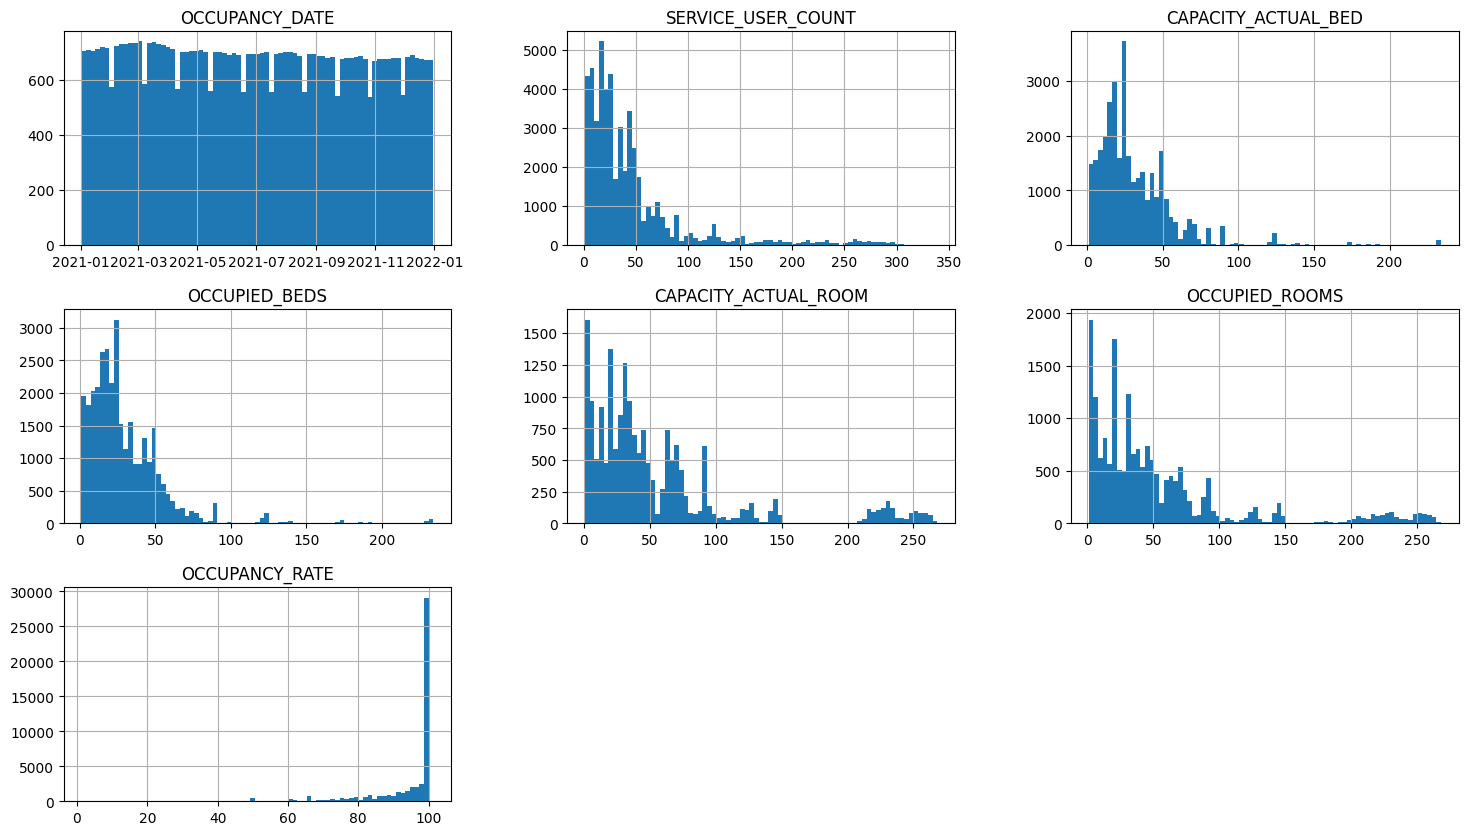

In [51]:
# Plot basic histograms for quantitative columns
df.hist(figsize=(18,10), bins=75)

<ipython-input-52-5855911d20ae>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


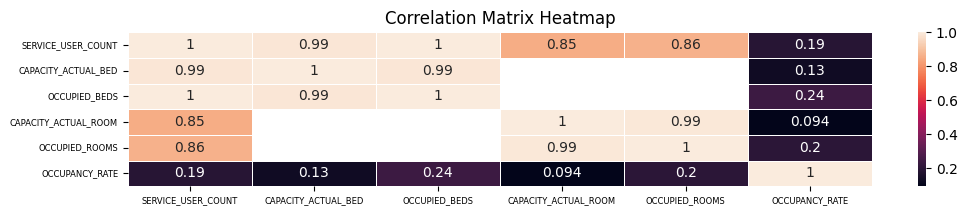

In [52]:
# Create and store correlation matrix
correlation_matrix = df.corr()

# Create a heatmap using seaborn with adjusted label sizes
plt.figure(figsize=(12, 2))
heatmap = sns.heatmap(correlation_matrix, annot=True, linewidths=.5, annot_kws={"size": 10})

# Set title
plt.title('Correlation Matrix Heatmap')

# Adjust x-axis tick label size
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=6, rotation=0)

# Adjust y-axis tick label size
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=6, rotation=0)

# Show the plot
plt.show()


([<matplotlib.axis.XTick at 0x7ed93b200b80>,
 [Text(1, 0, 'Service User Count'),
  Text(2, 0, 'Capacity Actual Bed'),
  Text(3, 0, 'Occupied Beds'),
  Text(4, 0, 'Capacity Actual Room'),
  Text(5, 0, 'Occupied Rooms'),
  Text(6, 0, 'Occupancy Rate')])

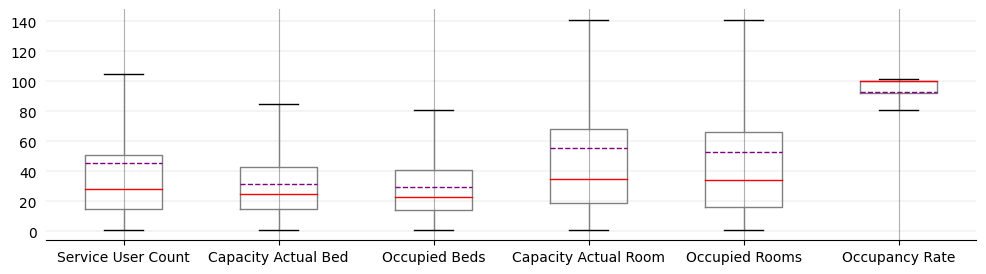

In [53]:
# Plot settings
fig, ax = plt.subplots(figsize=(12, 3))

# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Remove y-axis tick marks
ax.yaxis.set_ticks_position('none')

# Add major gridlines in the y-axis
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)

# Define features to boxplot
boxplot_compare = df[['SERVICE_USER_COUNT',
                  'CAPACITY_ACTUAL_BED',
                  'OCCUPIED_BEDS',
                  'CAPACITY_ACTUAL_ROOM',
                  'OCCUPIED_ROOMS',
                  'OCCUPANCY_RATE']]

# Plot boxplot
boxplot_compare.boxplot(figsize=(16,8),
          meanline=True,
          showmeans=True,
          showfliers=False,
          boxprops=dict(color='grey'),
          whiskerprops=dict(color='grey'),
          medianprops=dict(color='r'),
          meanprops=dict(color='purple')
          )

# Define labels
labels = ['Service User Count', 'Capacity Actual Bed', 'Occupied Beds', 'Capacity Actual Room', 'Occupied Rooms', 'Occupancy Rate']
plt.xticks(range(1, 7), labels)

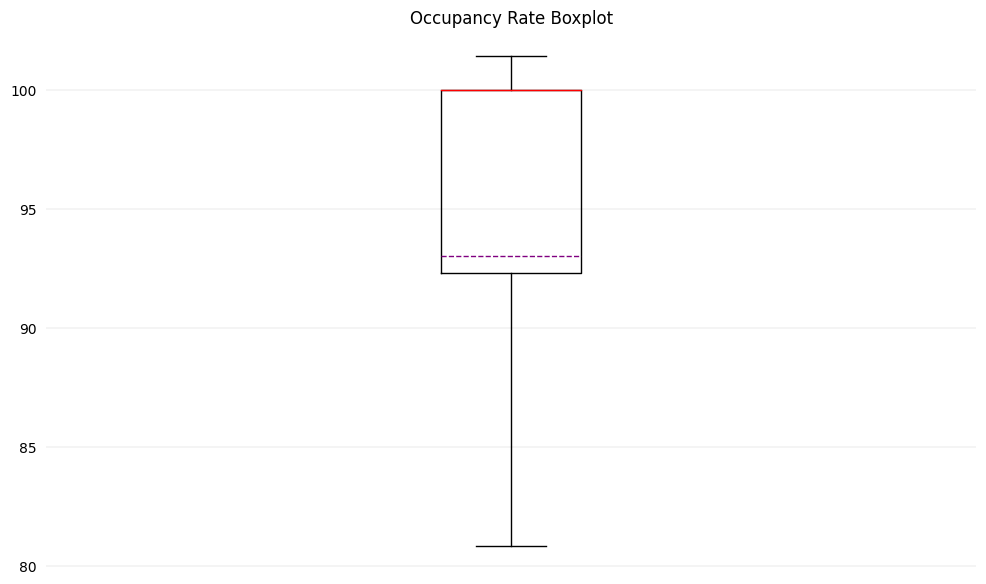

In [54]:
# Plot settings
fig, ax = plt.subplots(figsize=(12, 7))

# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Remove y-axis tick marks
ax.yaxis.set_ticks_position('none')

# Add major gridlines in the y-axis
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)

# Set plot title
ax.set_title('Occupancy Rate Boxplot')

# Set species names as labels for the boxplot
dataset = df[['OCCUPANCY_RATE']]

# Create boxplot
ax.boxplot(dataset,
           meanline=True,
           showmeans=True,
           showfliers=False,
           medianprops=dict(color='r'),
           meanprops=dict(color='purple')
           )

# Remove x-axis label
ax.set_xlabel('')
# Remove x-axis ticks
ax.set_xticks([])

# Show the plot
plt.show()

Map Month using datetime module. Then determine seasons based on months.

In [55]:
import datetime

# Calculate occupancy rates
df['OCCUPANCY_MONTH'] = df['OCCUPANCY_DATE'].apply(lambda x: x.month)

# Show dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50944 entries, 0 to 50943
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   OCCUPANCY_DATE        50944 non-null  datetime64[ns]
 1   CAPACITY_TYPE         50944 non-null  object        
 2   PROGRAM_MODEL         50942 non-null  object        
 3   SERVICE_USER_COUNT    50944 non-null  int64         
 4   CAPACITY_ACTUAL_BED   32399 non-null  float64       
 5   OCCUPIED_BEDS         32399 non-null  float64       
 6   CAPACITY_ACTUAL_ROOM  18545 non-null  float64       
 7   OCCUPIED_ROOMS        18545 non-null  float64       
 8   OCCUPANCY_RATE        50944 non-null  float64       
 9   OCCUPANCY_MONTH       50944 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(2), object(2)
memory usage: 3.9+ MB


<ipython-input-55-a49376fffdb6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OCCUPANCY_MONTH'] = df['OCCUPANCY_DATE'].apply(lambda x: x.month)


In [56]:
# Show quantitative data statistics
df.describe()

,SERVICE_USER_COUNT,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS,OCCUPANCY_RATE,OCCUPANCY_MONTH
count,50944.000000,32399.000000,32399.000000,18545.000000,18545.000000,50944.000000,50944.000000
mean,45.727171,31.627149,29.780271,55.549259,52.798598,93.014233,6.446647
std,53.326049,27.127682,26.379416,59.448805,58.792954,13.878780,3.448736
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.200000,1.000000
25%,15.000000,15.000000,14.000000,19.000000,16.000000,92.310000,3.000000
50%,28.000000,25.000000,23.000000,35.000000,34.000000,100.000000,6.000000
75%,51.000000,43.000000,41.000000,68.000000,66.000000,100.000000,9.000000
max,339.000000,234.000000,234.000000,268.000000,268.000000,101.410000,12.000000


**Exceeding capacity:**

In [57]:
# Count number of time occupancy rate is above 100%
df['OCCUPANCY_RATE'][df['OCCUPANCY_RATE'] > 100].count()

4

In [58]:
# Show rows where occupancy rate is above 100%
df[df['OCCUPANCY_RATE'] > 100]

,OCCUPANCY_DATE,CAPACITY_TYPE,PROGRAM_MODEL,SERVICE_USER_COUNT,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS,OCCUPANCY_RATE,OCCUPANCY_MONTH
23013,2021-06-11,Room Based Capacity,Emergency,137,NaN,NaN,79.0,80.0,101.27,6
24536,2021-06-22,Room Based Capacity,Emergency,115,NaN,NaN,71.0,72.0,101.41,6
24675,2021-06-23,Room Based Capacity,Emergency,117,NaN,NaN,73.0,74.0,101.37,6
24814,2021-06-24,Room Based Capacity,Emergency,111,NaN,NaN,71.0,72.0,101.41,6


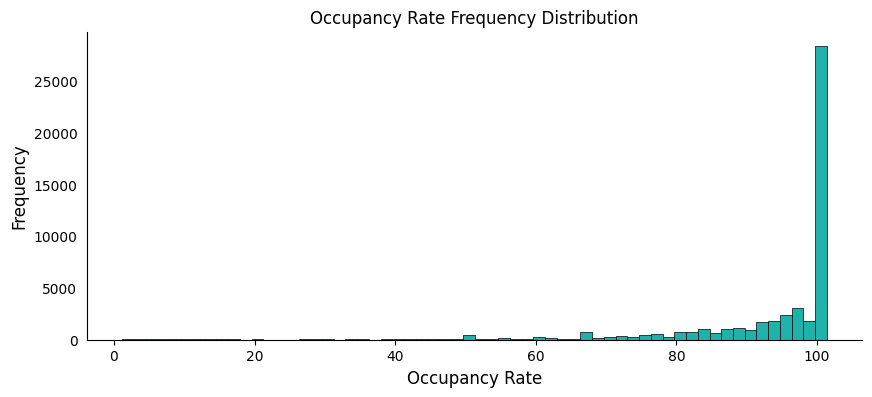

In [59]:
# Plot settings
fig, ax = plt.subplots(figsize=(10, 4))

# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Remove y-axis tick marks
ax.yaxis.set_ticks_position('none')

# Add major gridlines in the y-axis
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.2, alpha=0.5)

# Get a OCCUPANCY_RATE data
occupancy_rate = df['OCCUPANCY_RATE']

# Create a histogram'
occupancy_rate.plot(kind='hist',
                    bins=60,
                    color='lightseagreen',
                    edgecolor='black',
                    linewidth=0.5,
                    title='Occupancy Rate Frequency Distribution',
                    fontsize=10)

# Include x-axis and y-axis labels
plt.xlabel('Occupancy Rate', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Display the plot
plt.show()

### Removing Outliers

In [60]:
# Define outlier upper and lower boundaries
occupancy_outlier_min = df['OCCUPANCY_RATE'].quantile(0.003)
occupancy_outlier_max = df['OCCUPANCY_RATE'].quantile(0.997)

# Print outlier boundaries
print(occupancy_outlier_min)
print(occupancy_outlier_max)

8.82
100.0


In [61]:
# Define condition that exclude outliers from df
condition = (df['OCCUPANCY_RATE'] >= occupancy_outlier_min) & (df['OCCUPANCY_RATE'] <= occupancy_outlier_max)
df = df[condition]

# Show clean dataset without outliers
df

,OCCUPANCY_DATE,CAPACITY_TYPE,PROGRAM_MODEL,SERVICE_USER_COUNT,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS,OCCUPANCY_RATE,OCCUPANCY_MONTH
0,2021-01-01,Room Based Capacity,Emergency,74,NaN,NaN,29.0,26.0,89.66,1
1,2021-01-01,Room Based Capacity,Emergency,3,NaN,NaN,3.0,3.0,100.00,1
2,2021-01-01,Room Based Capacity,Emergency,24,NaN,NaN,28.0,23.0,82.14,1
3,2021-01-01,Room Based Capacity,Emergency,25,NaN,NaN,17.0,17.0,100.00,1
4,2021-01-01,Room Based Capacity,Emergency,13,NaN,NaN,14.0,13.0,92.86,1
...,...,...,...,...,...,...,...,...,...,...
50939,2021-12-31,Bed Based Capacity,Emergency,6,20.0,6.0,NaN,NaN,30.00,12
50940,2021-12-31,Bed Based Capacity,Emergency,23,23.0,23.0,NaN,NaN,100.00,12
50941,2021-12-31,Bed Based Capacity,Transitional,13,14.0,13.0,NaN,NaN,92.86,12
50942,2021-12-31,Bed Based Capacity,Emergency,10,10.0,10.0,NaN,NaN,100.00,12


### Vizualization of Occupancy Rate without Outliers

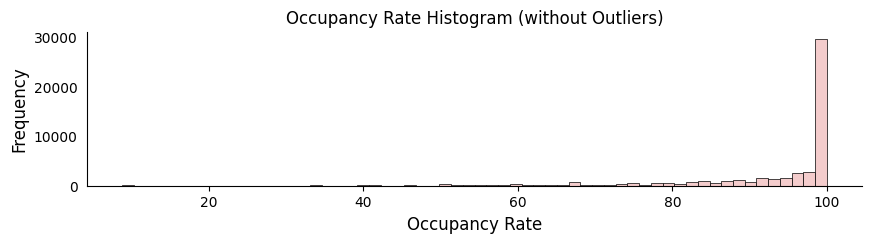

In [62]:
# Plot settings
fig, ax = plt.subplots(figsize=(10, 2))

# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Remove y-axis tick marks
ax.yaxis.set_ticks_position('none')

# Add  gridlines
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.2, alpha=0.5)

# Store the OCCUPANCY_RATE column in a new dataset
occupancy_rate = df['OCCUPANCY_RATE']

# Create a histogram for the 'occupancy_rate' subset
occupancy_rate.plot(kind='hist',
                    bins=60,
                    color='#F4CCCC',
                    edgecolor='black',
                    linewidth=0.5,
                    title='Occupancy Rate Histogram (without Outliers)',
                    fontsize=10)

# Add x-axis and y-axis labels to the plot
plt.xlabel('Occupancy Rate', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Display the plot
plt.show()

# Research Question #1


**How does shelter occupancy vary over the months of the year, and are there any significant differences between cold and warm seasons?**


> *   **Analysis Idea:** i'll look into explore the overall trend of shelter occupancy over the year, especially between warm and cold weather.


> *   **Objective:** understand the overall trend of shelter occupancy throughout the year. Maybe compare Winter/Fall month vs Summer months?


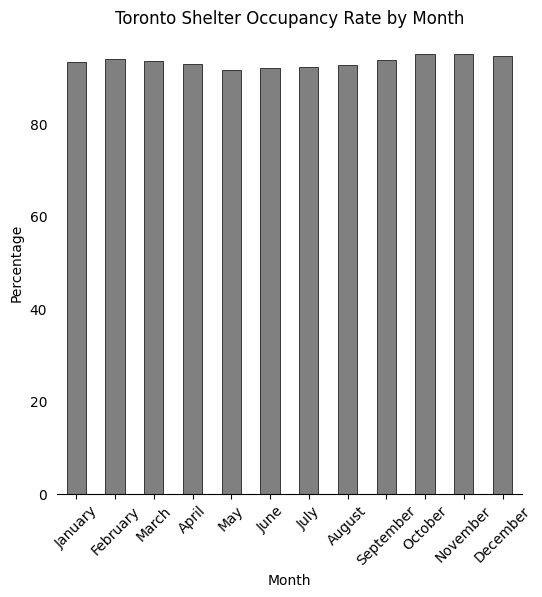

In [63]:
# Plot settings
fig, ax = plt.subplots(figsize=(6, 6))

# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Remove y-axis tick marks
ax.yaxis.set_ticks_position('none')

# Get and plot monthly occupancy rates
monthly_occupancy = df.filter(items=['OCCUPANCY_MONTH', 'OCCUPANCY_RATE']).groupby('OCCUPANCY_MONTH').mean()
monthly_occupancy.plot(kind='bar', color='grey', edgecolor='black', linewidth=0.5, ax=ax)

# Set labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Percentage')
ax.set_title('Toronto Shelter Occupancy Rate by Month')
ax.legend().set_visible(False)  # Hide legend

# Customize x-axis ticks
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.xticks(range(0, 12), months, rotation=45)

# Show the plot
plt.show()


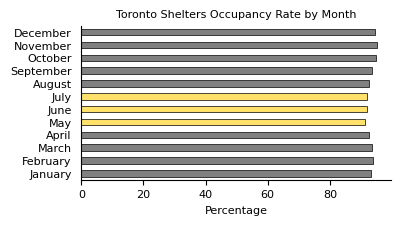

In [64]:
COLD_COLOR = '#07B4D6'
WARM_COLOR = '#FFE16C'

# Define a list of colors for each month
colors = ['grey', 'grey', 'grey', 'grey', WARM_COLOR, WARM_COLOR, WARM_COLOR, 'grey', 'grey', 'grey', 'grey', 'grey']

# Plot settings
fig, ax = plt.subplots(figsize=(4, 2))

# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Remove y-axis tick marks
ax.yaxis.set_ticks_position('none')

monthly_occupancy = df.filter(items=['OCCUPANCY_MONTH', 'OCCUPANCY_RATE']).groupby('OCCUPANCY_MONTH').mean()

# Plot the horizontal bar chart
monthly_occupancy['OCCUPANCY_RATE'].plot(kind='barh', color=colors, ax=ax, edgecolor='black', linewidth=0.5, fontsize=8)

# Set custom y-axis tick labels
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
ax.set_yticklabels(months)

# Set labels + title
ax.set_ylabel('', fontsize=8)
ax.set_xlabel('Percentage', fontsize=8)
ax.set_title('Toronto Shelters Occupancy Rate by Month', fontsize=8)

# Show the plot
plt.show()

**Season Start Date in 2021:**

*   Spring START: March 20, 2021

*   Summer START: June 21, 2021

*   Fall START: September 22, 2021

*   Winter START: December 21, 2021

In [65]:
from datetime import datetime, timedelta

# Initial date to start checking seasons
date = datetime(2021, 1, 1)

# Define start dates for each season
spring_start = datetime(2021, 3, 20)
summer_start = datetime(2021, 6, 21)
fall_start = datetime(2021, 9, 22)
winter_start = datetime(2021, 12, 21)

# Loop through the dataframe's indices
for row in df.index:
    # Get the occupancy date from df
    date = df.at[row, 'OCCUPANCY_DATE']

    # Check which season the date falls into and assign seasonn label
    if spring_start <= date < summer_start:
        df.at[row, 'OCCUPANCY_SEASON'] = 'SPRING'
    elif summer_start <= date < fall_start:
        df.at[row, 'OCCUPANCY_SEASON'] = 'SUMMER'
    elif fall_start <= date < winter_start:
        df.at[row, 'OCCUPANCY_SEASON'] = 'FALL'
    else:
        df.at[row, 'OCCUPANCY_SEASON'] = 'WINTER'

df

<ipython-input-65-69705294f69b>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.at[row, 'OCCUPANCY_SEASON'] = 'WINTER'


,OCCUPANCY_DATE,CAPACITY_TYPE,PROGRAM_MODEL,SERVICE_USER_COUNT,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS,OCCUPANCY_RATE,OCCUPANCY_MONTH,OCCUPANCY_SEASON
0,2021-01-01,Room Based Capacity,Emergency,74,NaN,NaN,29.0,26.0,89.66,1,WINTER
1,2021-01-01,Room Based Capacity,Emergency,3,NaN,NaN,3.0,3.0,100.00,1,WINTER
2,2021-01-01,Room Based Capacity,Emergency,24,NaN,NaN,28.0,23.0,82.14,1,WINTER
3,2021-01-01,Room Based Capacity,Emergency,25,NaN,NaN,17.0,17.0,100.00,1,WINTER
4,2021-01-01,Room Based Capacity,Emergency,13,NaN,NaN,14.0,13.0,92.86,1,WINTER
...,...,...,...,...,...,...,...,...,...,...,...
50939,2021-12-31,Bed Based Capacity,Emergency,6,20.0,6.0,NaN,NaN,30.00,12,WINTER
50940,2021-12-31,Bed Based Capacity,Emergency,23,23.0,23.0,NaN,NaN,100.00,12,WINTER
50941,2021-12-31,Bed Based Capacity,Transitional,13,14.0,13.0,NaN,NaN,92.86,12,WINTER
50942,2021-12-31,Bed Based Capacity,Emergency,10,10.0,10.0,NaN,NaN,100.00,12,WINTER


In [66]:
# Show the mean occupancy rate for each season
df.filter(items=['OCCUPANCY_SEASON', 'OCCUPANCY_RATE']).groupby('OCCUPANCY_SEASON').mean()

,OCCUPANCY_RATE
OCCUPANCY_SEASON,
FALL,94.786313
SPRING,92.117990
SUMMER,92.524339
WINTER,93.760738


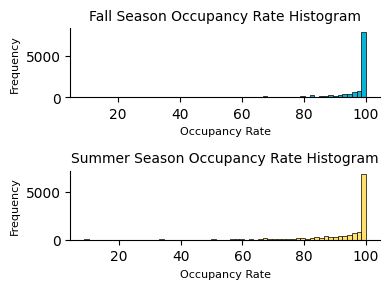

In [67]:
# Get data for FALL and SUMMER seasons
fall_data = df[df['OCCUPANCY_SEASON'] == 'FALL']['OCCUPANCY_RATE']
summer_data = df[df['OCCUPANCY_SEASON'] == 'SUMMER']['OCCUPANCY_RATE']

# Plotting histograms for FALL and SUMMER
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(4, 3))

# Remove top and right border for both subplots
for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Histogram for FALL season
axes[0].hist(fall_data, bins=60, color=COLD_COLOR, edgecolor='black', linewidth=0.5)
axes[0].set_title('Fall Season Occupancy Rate Histogram', fontsize=10)
axes[0].set_xlabel('Occupancy Rate', fontsize=8)
axes[0].set_ylabel('Frequency', fontsize=8)

# Histogram for SUMMER season
axes[1].hist(summer_data, bins=60, color=WARM_COLOR, edgecolor='black', linewidth=0.5)
axes[1].set_title('Summer Season Occupancy Rate Histogram', fontsize=10)
axes[1].set_xlabel('Occupancy Rate', fontsize=8)
axes[1].set_ylabel('Frequency', fontsize=8)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

In [68]:
from scipy.stats import ttest_ind

# Perform two-sample t-test
t_stat, p_value = ttest_ind(fall_data, summer_data, equal_var=False)

# Show the t-test results
print(f't-statistic: {t_stat}')
print(f'p-value: {p_value}')

# Checking for statistical significance
alpha = 0.05
if p_value < alpha:
    print('The difference in means is statistically significant.')
else:
    print('The difference in means is not statistically significant.')

t-statistic: 13.709974341349328
p-value: 1.2648784270620004e-42
The difference in means is statistically significant.


# Research Questions #2:



**Are there significant differences in the occupancy rates of emergency and transitional shelter programs, and if so, in which direction?**


> *   **Analysis Idea:** I'll be visualizing the differences using box plots or bar charts. I'll use t-tests to compare the occupancy rates between emergency and transitional shelter programs.

> *   **Objective:** I'll examine the differences in occupancy rates between emergency and transitional shelter programs.




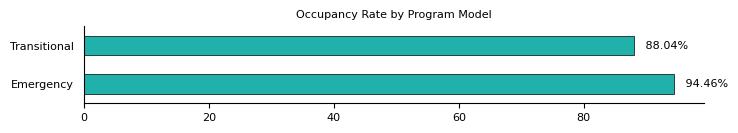

In [69]:
# Plot settings
fig, ax = plt.subplots(figsize=(8, 1))

# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)

# Remove y-axis tick marks
ax.yaxis.set_ticks_position('none')

filter_program_model = df.filter(items=['PROGRAM_MODEL','OCCUPANCY_RATE']).groupby('PROGRAM_MODEL').mean()

filter_program_model.plot(kind='barh',
                      ax=ax,
                      color='lightseagreen',
                      ylabel='',
                      fontsize=8,
                      edgecolor='black',
                      linewidth=0.5,
                      legend=False)

ax.set_title('Occupancy Rate by Program Model', fontsize=8)

# Add numbers on top of the bars to represent the mean occupancy rate
for i, value in enumerate(filter_program_model['OCCUPANCY_RATE']):
    plt.text(value + 0.2, i, f'   {value:.2f}%', ha='left', va='center', fontsize=8)

plt.show()


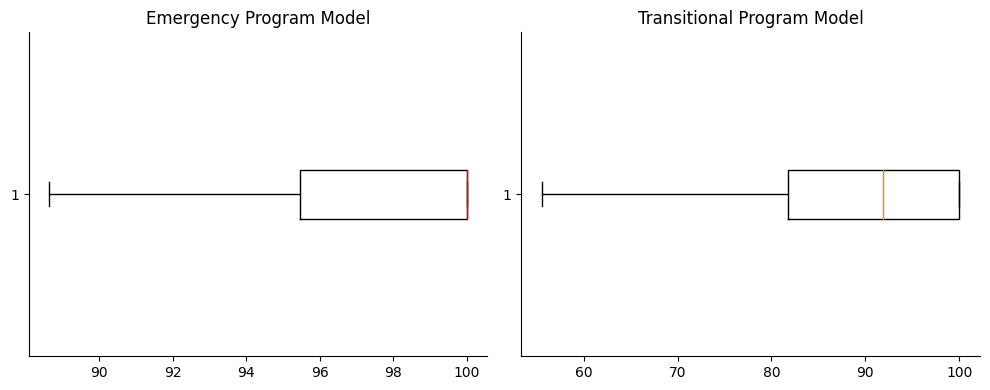

In [70]:
# Get data for Emergency and Transitional program models
emergency_data = df[df['PROGRAM_MODEL'] == 'Emergency']['OCCUPANCY_RATE']
transitional_data = df[df['PROGRAM_MODEL'] == 'Transitional']['OCCUPANCY_RATE']

# Plotting horizontal side-by-side boxplots for Emergency and Transitional program models
fig, axes = plt.subplots(ncols=2, figsize=(10, 4))

# Remove top and right border for both subplots
for ax in axes:
    ax.spines[['top', 'right']].set_visible(False)
    ax.spines['bottom'].set_visible(True)

# Boxplot for Emergency Program Model
axes[0].boxplot(emergency_data, vert=False, showfliers=False, meanline=True, medianprops=dict(color='red'), meanprops=dict(color='purple'))
axes[0].set_xlabel('')
axes[0].set_title('Emergency Program Model')
# Boxplot for Transitional Program Model
axes[1].boxplot(transitional_data, vert=False, showfliers=False, meanline=True)
axes[1].set_xlabel('')

axes[1].set_title('Transitional Program Model')

# Adjust layout to prevent overlap
plt.tight_layout()


In [71]:
# Perform two-sample t-test
t_stat, p_value = ttest_ind(emergency_data, transitional_data, equal_var=False)

# show the results
print(f't-statistic: {t_stat}')
print(f'p-value: {p_value}')

# Checking for statistical significance
alpha = 0.05
if p_value < alpha:
    print('The difference in means is statistically significant.')
else:
    print('The difference in means is not statistically significant.')

t-statistic: 43.79810975299453
p-value: 0.0
The difference in means is statistically significant.


# Research Question #3:



**Do programs with room-based capacity exhibit different occupancy characteristics compared to programs with bed-based capacity?**


> *   **Analysis Idea:** visualize the differences using histograms. Also conduct t-tests to compare occupancy rates between room-based and bed-based capacity programs.

> *   **Objective:** maybe a compare the occupancy rates of programs with room-based and bed-based capacity.


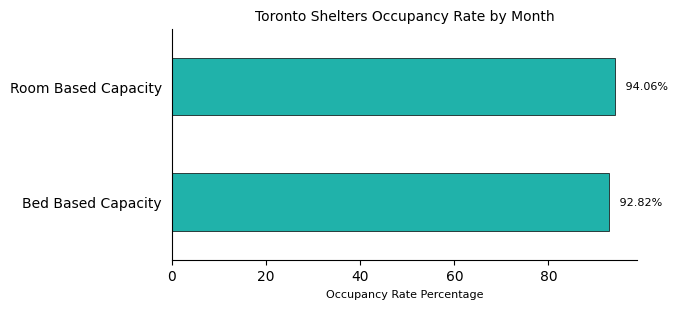

In [72]:
# Plot settings
fig, ax = plt.subplots(figsize=(6, 3))

# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)

# Remove y-axis tick marks
ax.yaxis.set_ticks_position('none')

# Filter and group the DataFrame 'df' by 'CAPACITY_TYPE' and calculate the mean 'OCCUPANCY_RATE'
filter_capacity_type = df.filter(items=['CAPACITY_TYPE', 'OCCUPANCY_RATE']).groupby('CAPACITY_TYPE').mean()

# Create a bar plot for the mean 'OCCUPANCY_RATE' grouped by 'CAPACITY_TYPE'
filter_capacity_type.plot(kind='barh',
                          ax=ax,
                          color='lightseagreen',
                          xlabel='Capacity Type',
                          ylabel='',
                          fontsize=10,
                          legend=False,
                          edgecolor='black',
                          linewidth=0.5)

# Add numbers on top of the bars to represent the mean occupancy rate
for i, value in enumerate(filter_capacity_type['OCCUPANCY_RATE']):
    plt.text(value, i, f'   {value:.2f}%', ha='left', va='center', fontsize=8)

ax.set_title('Toronto Shelters Occupancy Rate by Month', fontsize=10)
ax.set_xlabel('Occupancy Rate Percentage', fontsize=8)

# Display the plot
plt.show()


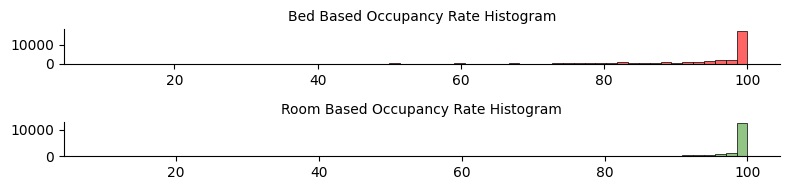

In [73]:
bed_capacity_data = df[df['CAPACITY_TYPE'] == 'Bed Based Capacity']['OCCUPANCY_RATE']
room_capacity_data = df[df['CAPACITY_TYPE'] == 'Room Based Capacity']['OCCUPANCY_RATE']

# Plotting histograms for bed and room capacities on separate canvases
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 2))

# Remove top and right border for both subplots
for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Histogram for FALL
axes[0].hist(bed_capacity_data, bins=60, color='#FF6565', edgecolor='black', linewidth=0.5)
axes[0].set_title('Bed Based Occupancy Rate Histogram', fontsize=10)
axes[0].set_xlabel('')
axes[0].set_ylabel('')

# Histogram for SUMMER
axes[1].hist(room_capacity_data, bins=60, color='#92C486', edgecolor='black', linewidth=0.5)
axes[1].set_title('Room Based Occupancy Rate Histogram', fontsize=10)
axes[1].set_xlabel('')
axes[1].set_ylabel('')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

In [74]:
# Perform two-sample t-test
t_stat, p_value = ttest_ind(bed_capacity_data, room_capacity_data, equal_var=False)

# Show the results
print(f't-statistic: {t_stat}')
print(f'p-value: {p_value}')

# Checking for statistical significance
alpha = 0.05
if p_value < alpha:
    print('The difference in means is statistically significant.')
else:
    print('The difference in means is not statistically significant.')

t-statistic: -9.802846881903566
p-value: 1.175399592234721e-22
The difference in means is statistically significant.
